In [3]:
import cv2
import numpy as np
import pytesseract # se usa para leer los dígitos en las imágenes
from PIL import Image # transformación de imagen leída con OpenCV para usarla con pytesseract 
import matplotlib.pyplot as plt

In [4]:
pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

In [5]:

def encontrar_rango_temperatura(img, y1, y2, x1, x2):
    '''
    Encuentra el número que indica el rango de temperatura para esa imagen.
    :param img: La imagen donde se encuentra el rango de temperatura.
    :param y1: Inicio de la altura de la etiqueta de escala de temperatura.
    :param y2: Fin de la altura de la etiqueta de escala de temperatura.
    :param x1: Inicio del ancho de la etiqueta de escala de temperatura.
    :param x2: Fin del ancho de la etiqueta de escala de temperatura.
    :return: Un valor de rango de temperatura leído.
    '''
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    roi = gris[y1:y2, x1:x2]  # Región de Interés

    umbral = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    kernel = np.ones((1, 1), np.uint8)
    dilatacion = cv2.dilate(umbral, kernel, iterations=1)

    # Reconocer texto con tesseract para python
    imagen_binaria = Image.fromarray(dilatacion)
    rango_temperatura = pytesseract.image_to_string(imagen_binaria,
                                                    config='--psm 7 -c tessedit_char_whitelist=01234567890.')
    return float(rango_temperatura)



In [6]:
def encontrar_pixel_caliente(img, radio=3):
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Aplicar un desenfoque gaussiano a la imagen y luego encontrar la región más brillante
    gris = cv2.GaussianBlur(gris, (radio, radio), 0)
    return cv2.minMaxLoc(gris)

In [7]:
img = cv2.imread('imagenes/2.jpg', 1)
y, x, _ = img.shape
img_copia = img.copy()

In [8]:
rango_temp_max = encontrar_rango_temperatura(img_copia, 42, 62, 280, 315)
rango_temp_min = encontrar_rango_temperatura(img_copia, 178, 194, 280, 315)

In [9]:
(minVal, maxVal, minLoc, maxLoc) = encontrar_pixel_caliente(img_copia)

In [14]:
valor_max = maxVal
valor_min = 0
valor_max_escala = 255
temperaturamax = ((valor_max - valor_min) / (valor_max_escala - valor_min)) * (rango_temp_max - rango_temp_min) + rango_temp_min

In [17]:
print(temperaturamax)

81.50117647058823


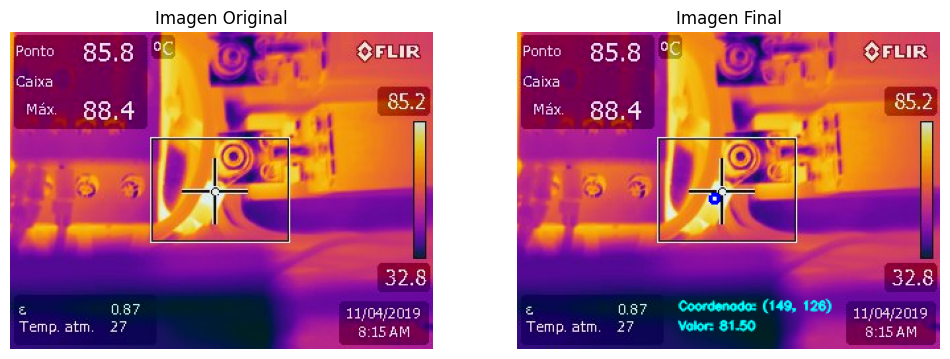

In [18]:
radio_circulo = 3
cv2.circle(img, maxLoc, radio_circulo, (255, 0, 0), 2)  
cv2.putText(img, f'Coordenada: {maxLoc}', (122, 210), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 0), 1, cv2.LINE_AA)
cv2.putText(img, f'Valor: {temperaturamax:.2f}', (122, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 0), 1, cv2.LINE_AA)

# Convertir la imagen a RGB para mostrar con matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Leer la imagen original también en RGB
img_original = cv2.cvtColor(cv2.imread('imagenes/2.jpg'), cv2.COLOR_BGR2RGB)

# Mostrar imágenes lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img_original)
axes[0].set_title('Imagen Original')
axes[0].axis('off')  

axes[1].imshow(img_rgb)
axes[1].set_title('Imagen Final')
axes[1].axis('off')  

plt.show()
